### Лабораторная работа

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

In [111]:
raw_df = pd.read_csv('data.csv', delimiter=';')
raw_df.head(5).T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [112]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [113]:
target = 'SaleCategory'

In [114]:
cols_to_drop = []
for col in raw_df.columns:
    if len(raw_df[col][raw_df[col].isnull()])>0.1*len(raw_df):
        cols_to_drop.append(col)

In [115]:
cols_to_drop

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [116]:
raw_df.drop(cols_to_drop, inplace=True, axis=1)

In [117]:
not_full_colls = []
for col in raw_df.columns:
    if len(raw_df[col][raw_df[col].isnull()])>0:
        not_full_colls.append(col)

In [118]:
raw_df[not_full_colls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
dtypes: float64(2), object(11)
memory usage: 148.4+ KB


In [119]:
raw_df[not_full_colls].head()

,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA


Среди неполных признаков - все, кроме двух категориальные

In [120]:
mean_MasVnrArea = np.round(raw_df['MasVnrArea'].mean(), 0)
median_GarageYrBlt = np.round(raw_df['GarageYrBlt'].median(), 0)

In [121]:
mean_MasVnrArea, median_GarageYrBlt 

(104.0, 1980.0)

In [122]:
raw_df['MasVnrArea'].fillna(mean_MasVnrArea, inplace=True)
raw_df['GarageYrBlt'].fillna(mode_GarageYrBlt, inplace=True)

In [123]:
for col in not_full_colls:
    raw_df[col].fillna(col + 'other', inplace=True)

In [124]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-

In [125]:
from sklearn.model_selection import StratifiedShuffleSplit

In [126]:
# Создадим стратифицированную выборку обучающего и тестового набора

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, 
                               random_state=42)
for train_index, test_index in split.split(raw_df, raw_df[target]):
    train_df = raw_df.iloc[train_index]
    test_df = raw_df.iloc[test_index]

In [127]:
train_df.shape, test_df.shape

((1168, 75), (292, 75))

In [128]:
cat_columns = []
num_columns = []
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        cat_columns.append(col)
    else:
        num_columns.append(col)

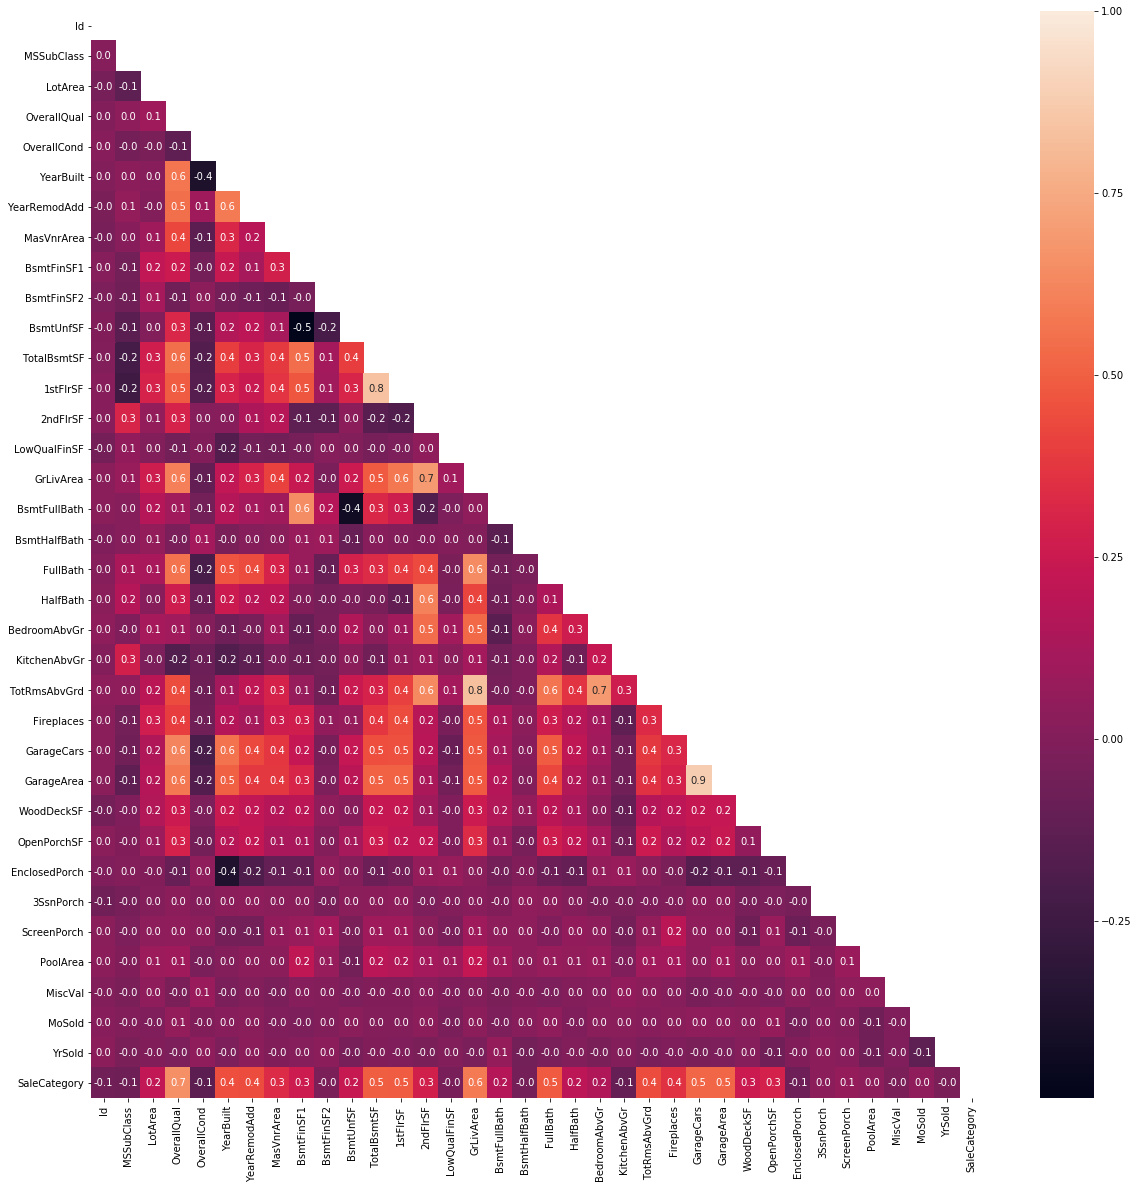

In [129]:
# Посмотрим на корреляцию признаков
corr = train_df[num_columns].corr()

plt.figure(figsize = (20,20))

mask = np.triu(np.ones((len(corr), len(corr))), k=0)

sns.heatmap(corr, annot=True, mask = mask,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            fmt=".1f"
           )

In [130]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 492 to 769
Data columns (total 75 columns):
Id               1168 non-null int64
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotArea          1168 non-null int64
Street           1168 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-null object
Exterior2nd      1168 non-null object
MasVnrType       1168 non

In [131]:
train_df[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 492 to 769
Data columns (total 36 columns):
Id               1168 non-null int64
MSSubClass       1168 non-null int64
LotArea          1168 non-null int64
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
MasVnrArea       1168 non-null float64
BsmtFinSF1       1168 non-null int64
BsmtFinSF2       1168 non-null int64
BsmtUnfSF        1168 non-null int64
TotalBsmtSF      1168 non-null int64
1stFlrSF         1168 non-null int64
2ndFlrSF         1168 non-null int64
LowQualFinSF     1168 non-null int64
GrLivArea        1168 non-null int64
BsmtFullBath     1168 non-null int64
BsmtHalfBath     1168 non-null int64
FullBath         1168 non-null int64
HalfBath         1168 non-null int64
BedroomAbvGr     1168 non-null int64
KitchenAbvGr     1168 non-null int64
TotRmsAbvGrd     1168 non-null int64
Fireplaces       1168 non-null int64
Ga

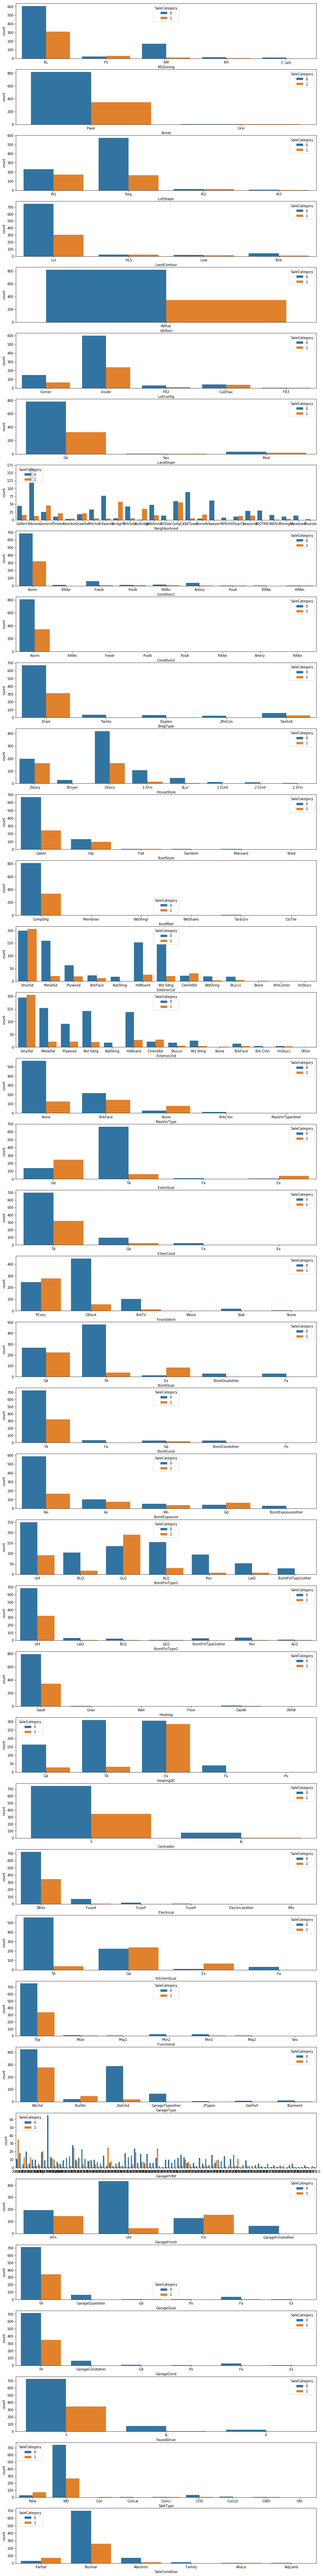

In [132]:
fig, axes = plt.subplots(ncols = 1, nrows=len(cat_columns), figsize=(16, 140))
for i, col in enumerate(cat_columns):
    
    sns.countplot(x = col, hue=target, data=train_df, ax=axes[i], )

In [133]:
def get_woe(df_train, df_test, col_list, target_col):
    IV_dict = {}
    for col in col_list:
        all_good = len(df_train[df_train[target_col] == 1][col])
        all_bad = len(df_train[df_train[target_col] == 0][col])
        odds_series = (
            df_train[df_train[target_col] == 1][col].value_counts()
            /
            df_train[df_train[target_col] == 0][col].value_counts()
        )
        distr_good = df_train[df_train[target_col] == 1][col].value_counts()/all_good
        distr_bad = df_train[df_train[target_col] == 0][col].value_counts()/all_bad
        odds_series = odds_series / all_good * all_bad
        category_woe_dict = np.log(odds_series).to_dict()
        df_train[col + '_woe'] = df_train[col].apply(category_woe_dict.get)
        df_test[col + '_woe'] = df_test[col].apply(category_woe_dict.get)
        df_train.fillna(0, inplace=True)
        df_test.fillna(0, inplace=True)
        IV_dict[col] = ((distr_good - distr_bad)*np.log(distr_good/distr_bad)).sum()
    return df_train, df_test, IV_dict

In [134]:
train_df, test_df, IV_dict = get_woe(train_df, test_df, cat_columns, target)


/home/sergey/work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/sergey/work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/sergey/work/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://panda

In [135]:
IV_dict

{'MSZoning': 0.45889903636642493,
 'Street': 0.00019019745626966782,
 'LotShape': 0.22417885187081715,
 'LandContour': 0.06338553020381331,
 'Utilities': 0.0,
 'LotConfig': 0.040997006768022086,
 'LandSlope': 0.012941475651635777,
 'Neighborhood': 2.1986303520161865,
 'Condition1': 0.13060347339043338,
 'Condition2': 0.0014770498955329894,
 'BldgType': 0.17204645799435062,
 'HouseStyle': 0.4203409689531118,
 'RoofStyle': 0.08868176288344286,
 'RoofMatl': 0.037912946761596705,
 'Exterior1st': 0.7975243693588102,
 'Exterior2nd': 0.8134500176590003,
 'MasVnrType': 0.6799789689614117,
 'ExterQual': 2.0175045895617134,
 'ExterCond': 0.02248745987212624,
 'Foundation': 1.0737762639181954,
 'BsmtQual': 1.7020501850155827,
 'BsmtCond': 0.08710159909395285,
 'BsmtExposure': 0.3435774211158122,
 'BsmtFinType1': 0.7798824096300538,
 'BsmtFinType2': 0.17581226032985153,
 'Heating': 0.0011084754804842139,
 'HeatingQC': 0.989052018853365,
 'CentralAir': 0.17642620371580428,
 'Electrical': 0.16765975

In [136]:
useless_cols = []
for k, v in IV_dict.items():
    if v<0.02:
        useless_cols.append(k)

In [137]:
useless_cols.extend(cat_columns)

In [138]:
useless_cols

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'Heating',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [139]:
train_df.drop(useless_cols, inplace=True, errors='ignore', axis=1)
test_df.drop(useless_cols, inplace=True, errors='ignore', axis=1)

/home/sergey/work/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [140]:
train_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual_woe,Functional_woe,GarageType_woe,GarageYrBlt_woe,GarageFinish_woe,GarageQual_woe,GarageCond_woe,PavedDrive_woe,SaleType_woe,SaleCondition_woe
492,493,60,15578,6,5,2006,2006,0.0,0,0,...,-1.820670,0.058742,0.437351,2.014555,0.560836,0.120783,0.135544,0.107121,1.787577,1.732571
1214,1215,85,10205,5,5,1962,1962,0.0,784,0,...,-1.820670,0.058742,0.437351,0.000000,-1.406973,0.120783,0.135544,0.107121,-0.168751,-0.134289
762,763,60,8640,7,5,2009,2009,0.0,24,0,...,0.930569,0.058742,0.437351,2.035757,-1.406973,0.120783,0.135544,0.107121,0.000000,-0.134289
157,158,60,12003,8,5,2009,2010,84.0,0,0,...,2.606302,0.058742,1.571755,2.035757,1.069161,0.120783,0.135544,0.107121,1.787577,1.732571
1155,1156,20,10768,5,8,1976,2004,0.0,1157,0,...,0.930569,0.058742,0.437351,-1.040018,0.560836,0.120783,0.135544,0.107121,-0.168751,-0.134289


In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import r2_score

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [148]:
x_train = train_df.drop(target, axis=1)
y_train = train_df[target].copy()

x_test = test_df.drop([target], axis=1)
y_test = test_df[target].copy()

In [149]:
x_train_sc = scaler.fit_transform(x_train)

/home/sergey/work/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sergey/work/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [150]:
x_test_sc = scaler.transform(x_test)

/home/sergey/work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [151]:
clf = LogisticRegression()

In [152]:
clf.fit(X=x_train_sc, y=y_train)

/home/sergey/work/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [153]:
y_train_predict = clf.predict_proba(x_train_sc)[:, 1]
y_test_predict = clf.predict_proba(x_test_sc)[:, 1]

roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 5)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 5)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  0.98877
Test:  0.97583


In [154]:
rss = np.sum((y_train_predict - y_train) ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (train_df.shape[0] - 1 - 1)))
print("R^2:", r2_score(y_train_predict, y_train))

RSS: 42.343113670397926
RSE: 0.19056455277392534
R^2: 0.7750552272664446


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost

In [155]:
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)
xgb.fit(x_train_sc, y_train)
y_train_predict = xgb.predict_proba(x_train_sc)[:, 1]
y_test_predict = xgb.predict_proba(x_test_sc)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 3)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 3)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  1.0
Test:  0.984


In [156]:
rss = np.sum((y_train_predict - y_train) ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (train_df.shape[0] - 1 - 1)))
print("R^2:", r2_score(y_train_predict, y_train))

RSS: 1.9015972161052623
RSE: 0.040384061187948364
R^2: 0.9915818669622235


In [157]:
from sklearn.decomposition import PCA

In [160]:
pca = PCA(n_components=x_train_sc.shape[1]).fit(x_train_sc)
for i in range(1, x_train_sc.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.187
n-components=2, explained variance 0.241
n-components=3, explained variance 0.293
n-components=4, explained variance 0.332
n-components=5, explained variance 0.364
n-components=6, explained variance 0.392
n-components=7, explained variance 0.418
n-components=8, explained variance 0.440
n-components=9, explained variance 0.461
n-components=10, explained variance 0.482
n-components=11, explained variance 0.502
n-components=12, explained variance 0.519
n-components=13, explained variance 0.536
n-components=14, explained variance 0.553
n-components=15, explained variance 0.569
n-components=16, explained variance 0.584
n-components=17, explained variance 0.600
n-components=18, explained variance 0.615
n-components=19, explained variance 0.630
n-components=20, explained variance 0.645
n-components=21, explained variance 0.659
n-components=22, explained variance 0.672
n-components=23, explained variance 0.686
n-components=24, explained variance 0.699
n

In [168]:
new_train_df = pd.DataFrame(PCA(n_components=53).fit_transform(x_train_sc))
new_test_df = pd.DataFrame(PCA(n_components=53).fit_transform(x_test_sc))

In [169]:
x_train_pca = new_train_df
x_test_pca = new_test_df

In [170]:
clf.fit(X=x_train_pca, y=y_train)

/home/sergey/work/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [171]:
y_train_predict = clf.predict_proba(x_train_pca)[:, 1]
y_test_predict = clf.predict_proba(x_test_pca)[:, 1]

roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 5)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 5)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  0.98582
Test:  0.90945


In [172]:
rss = np.sum((y_train_predict - y_train) ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (train_df.shape[0] - 1 - 1)))
print("R^2:", r2_score(y_train_predict, y_train))

RSS: 48.292857063840884
RSE: 0.2035130085563686
R^2: 0.7389602280925927


In [173]:
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)
xgb.fit(x_train_pca, y_train)
y_train_predict = xgb.predict_proba(x_train_pca)[:, 1]
y_test_predict = xgb.predict_proba(x_test_pca)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 3)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 3)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  1.0
Test:  0.915


In [174]:
rss = np.sum((y_train_predict - y_train) ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (train_df.shape[0] - 1 - 1)))
print("R^2:", r2_score(y_train_predict, y_train))

RSS: 0.818039392580845
RSE: 0.026487308728035036
R^2: 0.9964301690806366
